# The University of Hong Kong
## DASC7600 Data Science Project 2024
## EDA - Global - Case Counts

# Import Modules and Settings

In [1]:
import os
import sys

# Add project directory to system path
project_dir = os.path.dirname(os.getcwd())
sys.path.append(project_dir)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import covid_module

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

# Function

In [3]:
def check_cumlative_column(df: pd.DataFrame,
                           date_col: str,
                           group_by_col: str,
                           cnt_col: str,
                           cuml_cnt_col: str) -> None:
    df.sort_values(date_col, inplace=True)
    df['cuml_cnt_temp'] = df.groupby(group_by_col)[cnt_col].cumsum()
    if (df['cuml_cnt_temp'] == df[cuml_cnt_col]).min() == 1:
        is_or_is_not = 'is'
    else:
        is_or_is_not = 'is NOT'
    print(f'The column {cuml_cnt_col} {is_or_is_not} the cumulative column of {cnt_col}.')

# Load Data

In [4]:
# Read csv file
## Dataset name: Daily COVID-19 cases and deaths by date reported to WHO
## URL: https://data.who.int/dashboards/covid19/data
covid_global_case_count_df = pd.read_csv(project_dir + '/data/raw_data/global/WHO-COVID-19-global-data.csv')

# Basic Information of Data Set

In [5]:
# Print first 20 records
covid_global_case_count_df.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,EMRO,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,EMRO,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,EMRO,NaN,0,NaN,0
8,2020-03-01,AF,Afghanistan,EMRO,1.0,1,NaN,0
9,2020-03-08,AF,Afghanistan,EMRO,NaN,1,NaN,0


In [6]:
# Basic information of dataframe
covid_global_case_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


# Modify Data Types

In [7]:
# Modify data type for datatime column
covid_global_case_count_df['Date_reported'] = pd.to_datetime(covid_global_case_count_df['Date_reported'], format='%Y-%m-%d')

# Exploratory Data Analysis (EDA)

## Univariate Analysis

## Field - Date_reported

In [8]:
# Report date range of data set
min_date, max_date = covid_global_case_count_df['Date_reported'].agg(['min', 'max']).astype('str').to_list()
print('Date range of date reported:')
print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

Date range of date reported:
Min date: 2020-01-05
Max date: 2024-08-11


In [31]:
# Weekday in dataframe
weekday_list = covid_global_case_count_df['Date_reported'].dt.strftime('%w').drop_duplicates().to_list()
print(f'The weekday in the dataset are {str(weekday_list)[1:-1]}.')

The weekday in the dataset are '0'.


The value 0 represents Sunday. Therefore, the dataset contains only Sunday dates.

In [9]:
# Print the Sundays that are not included in the dataset
date_df = covid_global_case_count_df[['Date_reported']].set_index('Date_reported')
missing_date_index = pd.date_range(start=min_date, end=max_date, freq='W-SUN') \
    .difference(date_df.index) \
    .astype('str')

if len(missing_date_index) == 0:
    print('There is no missing Sunday in the date column.')
else:
    print(f'There are missing Sunday in the date column, between {missing_date_index.min()} and {missing_date_index.max()}.')

There is no missing Sunday in the date column.


## Field - Country_code

In [10]:
# Distinct values in country code column
print('Distinct values in country code column are:',
      str(covid_global_case_count_df['Country_code'].drop_duplicates().to_list())[1:-1])

Distinct values in country code column are: 'AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO', 'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP', 'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'XXL', 'XXF', 'XXJ', 'XXI', 'XXG', 'XXH', 'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG', 'NU

In [11]:
# Missing values in Country code column
covid_global_case_count_df[covid_global_case_count_df['Country_code'].isna()][['Country', 'Country_code']].drop_duplicates()

,Country,Country_code
35909,Namibia,NaN


All records with missing values in the 'Country_code' column are associated with the country Namibia. <br>
It is reasonable to assume that the country code for Namibia is NA and that it was mistakenly identified as a missing value.

In [12]:
# To correct the missing values in Country code column
covid_global_case_count_df['Country_code'] = covid_global_case_count_df['Country_code'].fillna('NA')

## Field - Country

In [13]:
# Distinct values in country column
print('Distinct values in country column are:',
      str(covid_global_case_count_df['Country'].drop_duplicates().to_list())[1:-1])

Distinct values in country column are: 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "C�te d'Ivoire", 'Croatia', 'Cuba', 'Cura�ao', 'Cyprus', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 

## Field - WHO_region

In [14]:
# Distinct values in WHO region column
print('Distinct values in WHO region column are:',
      str(covid_global_case_count_df['WHO_region'].drop_duplicates().to_list())[1:-1])

Distinct values in WHO region column are: 'EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'


## Fields - New_cases, Cumulative_cases, New_deaths and Cumulative_deaths

We printed 20 records at the beginning of this notebook. <br>
It appears that the missing values in the 'New_cases' and 'New_deaths' columns represent the value 0. <br>
Therefore, we attempted to fill the NAs with 0 and then validate our assumption.

In [15]:
# To fill NA with 0 for 'New_cases' and 'New_deaths'
covid_global_case_count_df['New_cases'] = covid_global_case_count_df['New_cases'].fillna(0)
covid_global_case_count_df['New_deaths'] = covid_global_case_count_df['New_deaths'].fillna(0)

In [16]:
# To verify our assumption
check_cumlative_column(covid_global_case_count_df, 'Date_reported', 'Country', 'New_cases', 'Cumulative_cases')
check_cumlative_column(covid_global_case_count_df, 'Date_reported', 'Country', 'New_deaths', 'Cumulative_deaths')

The column Cumulative_cases is the cumulative column of New_cases.
The column Cumulative_deaths is the cumulative column of New_deaths.


After filling the NAs with 0 in the 'New_cases' and 'New_deaths' columns, <br>
The 'Cumulative_cases' column is the cumulative total of 'New_cases' (similarly for 'Cumulative_deaths' and 'New_deaths'). <br>
This indicates that the values we filled (along with our assumption made above) are correct.

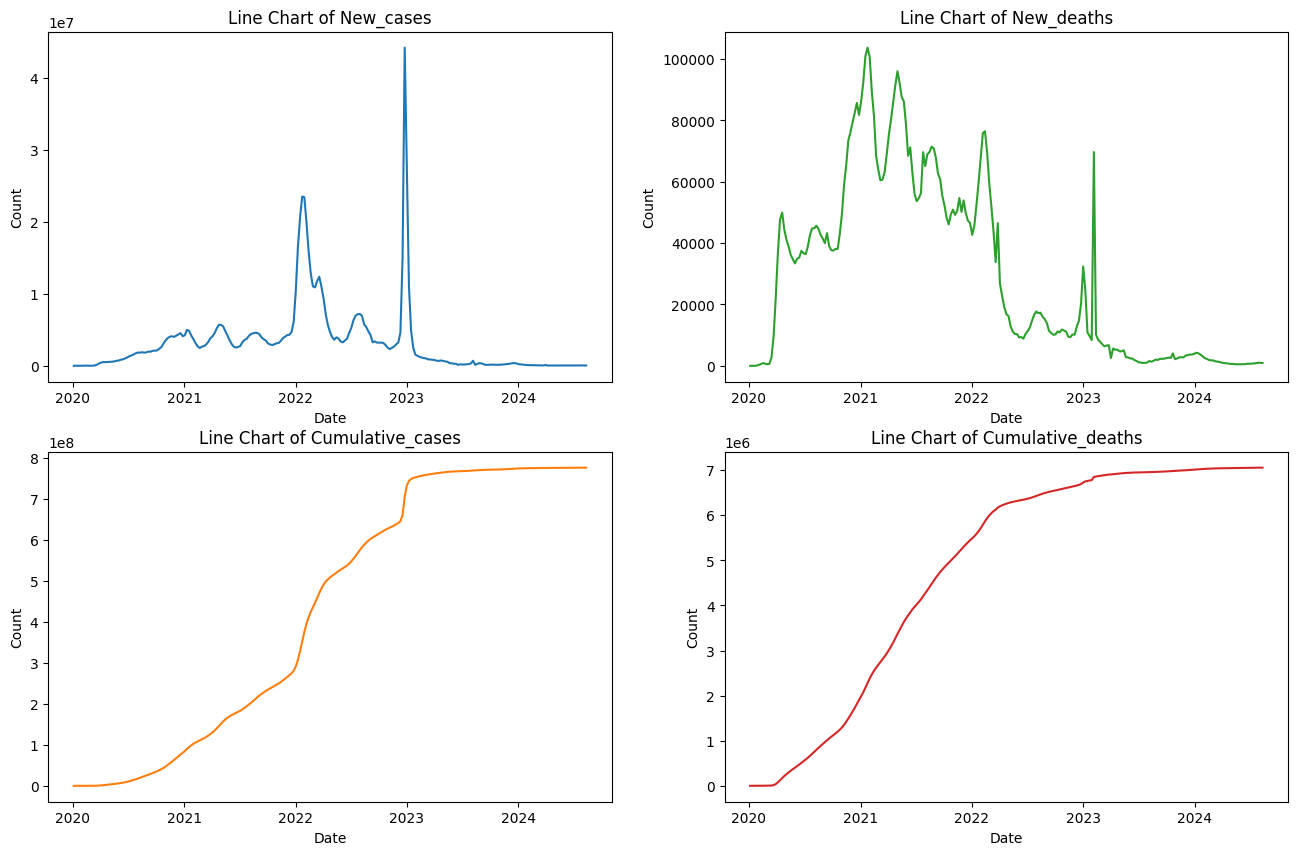

In [17]:
# Plot line charts for count columns
## Columns with counts
cnt_col = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']

## Aggregated counts
covid_global_agg_cnt = covid_global_case_count_df \
    .groupby('Date_reported') \
    [cnt_col] \
    .sum() \
    .reset_index()

## Figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

## Plot line charts for the count columns
for idx, col in enumerate(cnt_col):
    axes[idx%2, idx//2].plot_date(covid_global_agg_cnt['Date_reported'],
                        covid_global_agg_cnt[col],
                        marker='', linestyle='-', color=f'C{idx}')
    axes[idx%2, idx//2].set_title(f'Line Chart of {col}')
    axes[idx%2, idx//2].set_xlabel('Date')
    axes[idx%2, idx//2].set_ylabel('Count')

## Show the plot
plt.show()

## Multivariate Analysis

## Fields - Country_code, Country and WHO_region

In [18]:
for parent_col, child_col in [('Country', 'Country_code'),
                              ('Country_code', 'Country'),
                              ('Country', 'WHO_region')]:
    cnt_series = covid_global_case_count_df.groupby(parent_col)[child_col].nunique()
    if cnt_series.min() == cnt_series.max():
        print(f'For each value in {parent_col} column, there is/are {cnt_series.min()} distinct values in {child_col} column.')
    else:
        print(f'For each value in {parent_col} column, there are {cnt_series.min()} to {cnt_series.max()} distinct values in {child_col} column.')

For each value in Country column, there is/are 1 distinct values in Country_code column.
For each value in Country_code column, there is/are 1 distinct values in Country column.
For each value in Country column, there are 0 to 1 distinct values in WHO_region column.


The values in the 'Country_code' and 'Country' columns are in one-to-one correspondence. <br>
A country may have 0 or 1 WHO region, meaning it might have only a NULL value in the 'WHO_region' column, and no country has multiple values in the 'WHO_region' column.

## Missing Value Analysis

In [19]:
# The remaining number of missing values in each column
covid_module.print_missing_val_count(covid_global_case_count_df)

The following columns have missing values:
WHO_region: 4338 (7.5%)
